# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [1]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iters):

            y_predicted = np.dot(X, self.weights) + self.bias


            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)


            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):

        return np.dot(X, self.weights) + self.bias

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

Null values per column:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


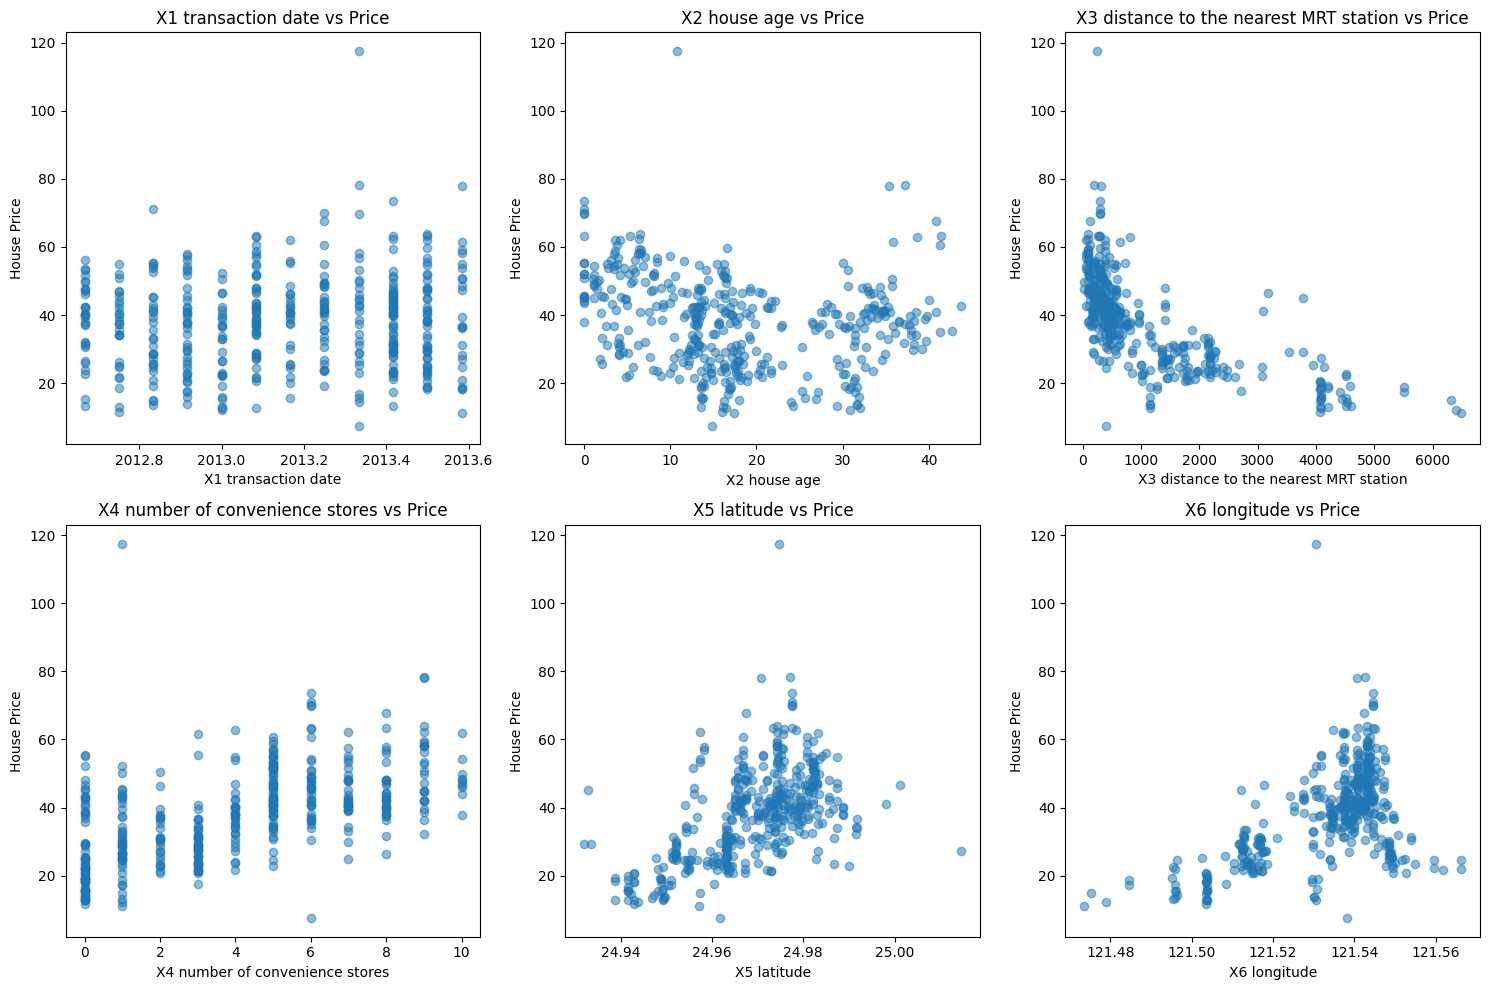

------------------------------
Custom Model MSE: 65.2572
Custom Model R2:  0.5886


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLR

# 1. Read the dataset
url = "/content/Real estate.csv"
df = pd.read_csv(url)

# 2. Check for null values
print("Null values per column:")
print(df.isnull().sum())

# 3. Plot columns (X) vs Price (Y)

X_columns = df.columns[1:-1]
y_column = df.columns[-1]

plt.figure(figsize=(15, 10))
for i, col in enumerate(X_columns):
    plt.subplot(2, 3, i+1)
    plt.scatter(df[col], df[y_column], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("House Price")
    plt.title(f"{col} vs Price")
plt.tight_layout()
plt.show()

# 4. Remove unwanted columns

df_clean = df.drop(['No', 'X1 transaction date'], axis=1)

# Separate Features and Target
X = df_clean.iloc[:, :-1].values
y = df_clean.iloc[:, -1].values

# 5. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 6. Normalize using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


custom_model = LinearRegression(learning_rate=0.05, n_iters=5000)
custom_model.fit(X_train_scaled, y_train)
y_pred_custom = custom_model.predict(X_test_scaled)


mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)

print("-" * 30)
print(f"Custom Model MSE: {mse_custom:.4f}")
print(f"Custom Model R2:  {r2_custom:.4f}")

# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset from sklearn.datasets
data = load_breast_cancer()

# 2. Separate out the X and Y columns
X = data.data
y = data.target

# 3. Normalize the X data using StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Create a train-test-split. Take any suitable test size (e.g., 20% or 25%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.25,
    random_state=42
)



5. Write code for the sigmoid function and Logistic regression.


In [8]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = 1 / (1 + np.exp(-z))
    return s * (1 - s)

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        # Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        # Implement the GD algorithm
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        # Write the predict function
        z = np.dot(X, self.weights) + self.bias
        y_prob = sigmoid(z)
        y_pred = [1 if i > 0.5 else 0 for i in y_prob]
        return np.array(y_pred)

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as SklearnLR


# Using the class we defined previously
custom_model = LogisticRegression(learning_rate=0.1, epochs=2000)
custom_model.fit(X_train, y_train)
y_pred_custom = custom_model.predict(X_test)

print(f"Custom Model Accuracy: {accuracy_score(y_test, y_pred_custom):.4f}")
print("-" * 30)



Custom Model Accuracy: 0.9930
------------------------------


# 9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

#  Best Sklearn Model (L2 - Default)
# We re-fit it to ensure we have the specific predictions ready
best_sklearn = SklearnLR(penalty='l2', solver='lbfgs', max_iter=5000, random_state=42)
best_sklearn.fit(X_train, y_train)
y_pred_sklearn = best_sklearn.predict(X_test)

# 2. Custom Model
custom_model = LogisticRegression(learning_rate=0.1, epochs=2000)
custom_model.fit(X_train, y_train)
y_pred_custom = custom_model.predict(X_test)

# 3. Evaluation Reports

print("="*40)
print("CUSTOM MODEL RESULTS")
print("="*40)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))

print("\n" + "="*40)
print("BEST SKLEARN MODEL (L2) RESULTS")
print("="*40)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sklearn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sklearn))

CUSTOM MODEL RESULTS
Confusion Matrix:
[[53  1]
 [ 0 89]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.99      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


BEST SKLEARN MODEL (L2) RESULTS
Confusion Matrix:
[[53  1]
 [ 2 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load the dataset
url = "/content/glass.csv"


column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df = pd.read_csv(url, names=column_names)

# Check the data structure
print("First 5 rows:")
print(df.head())

# 2. Extract X and Y columns


X = df.drop(['Id', 'Type'], axis=1).values  # Drop ID and Target to get Features
y = df['Type'].values                       # Extract Target

print(f"\nFeature Matrix (X) Shape: {X.shape}")
print(f"Target Vector (y) Shape: {y.shape}")

# 3. Split into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)

print(f"\nTraining Set Size: {X_train.shape[0]} samples")
print(f"Testing Set Size: {X_test.shape[0]} samples")

First 5 rows:
        Id     RI    Na    Mg     Al    Si     K  Ca  Ba    Fe  Type
0       RI     Na    Mg    Al     Si     K    Ca  Ba  Fe  Type   NaN
1  1.52101  13.64  4.49   1.1  71.78  0.06  8.75   0   0     1   NaN
2  1.51761  13.89   3.6  1.36  72.73  0.48  7.83   0   0     1   NaN
3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78   0   0     1   NaN
4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22   0   0     1   NaN

Feature Matrix (X) Shape: (215, 9)
Target Vector (y) Shape: (215,)

Training Set Size: 161 samples
Testing Set Size: 54 samples


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [13]:
import numpy as np

def euclidean_distance(x1, x2):
    # Calculate the sum of squared differences and take the square root
    return np.sqrt(np.sum((x1 - x2)**2))



In [14]:
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):

        self.X_train = X
        self.y_train = y

    def predict(self, X):

        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):


        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]


        k_indices = np.argsort(distances)[:self.k]


        k_nearest_labels = [self.y_train[i] for i in k_indices]


        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets


iris = datasets.load_iris()
df_X = pd.DataFrame(iris.data, columns=iris.feature_names) # Features
df_y = pd.Series(iris.target)                              # Target Labels


X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
    df_X, df_y, test_size=0.2, random_state=1234
)


X_train = np.array(X_train_df)
y_train = np.array(y_train_df)
X_test = np.array(X_test_df)
y_test = np.array(y_test_df)


clf = KNN(k=3)
clf.fit(X_train, y_train)


print("Training data stored successfully.")
predictions = clf.predict(X_test)


acc = np.sum(predictions == y_test) / len(y_test)
print(f"Predictions: {predictions}")
print(f"Accuracy: {acc * 100:.2f}%")

Training data stored successfully.
Predictions: [1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]
Accuracy: 100.00%


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [19]:
from sklearn.metrics import accuracy_score


k_values = [1, 3, 5, 7]

print(" Custom KNN Performance ")

for k in k_values:

    my_knn = KNN(k=k)


    my_knn.fit(X_train, y_train)


    my_predictions = my_knn.predict(X_test)


    acc = accuracy_score(y_test, my_predictions)

    print(f"k={k}: Accuracy = {acc*100:.2f}%")

 Custom KNN Performance 
k=1: Accuracy = 100.00%
k=3: Accuracy = 100.00%
k=5: Accuracy = 96.67%
k=7: Accuracy = 96.67%


In [18]:
from sklearn.neighbors import KNeighborsClassifier

print("Scikit-Learn KNN Performance (Comparison) ")


sklearn_knn = KNeighborsClassifier(n_neighbors=3)

sklearn_knn.fit(X_train, y_train)


sklearn_predictions = sklearn_knn.predict(X_test)


sklearn_acc = accuracy_score(y_test, sklearn_predictions)

print(f"Sklearn (k=3): Accuracy = {sklearn_acc*100:.2f}%")

matches = np.sum(my_predictions == sklearn_predictions)
total = len(y_test)
print(f"Match with custom model: {matches}/{total} predictions are identical.")

Scikit-Learn KNN Performance (Comparison) 
Sklearn (k=3): Accuracy = 100.00%
Match with custom model: 29/30 predictions are identical.
